# Implementation of gradient Boosting Algorithm

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Data Preparation

In [5]:
boston=load_boston()
X=pd.DataFrame(boston.data, columns=boston.feature_names)#Independent Columns

y=pd.Series(boston.target)#Dependent median value of House

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y[:10]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
dtype: float64

In [8]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

# Model training and evaluation

In [9]:
gradientReg=GradientBoostingRegressor(max_depth=2,n_estimators=3,
                                      learning_rate=1.0)

In [11]:
model = gradientReg.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([14.7631916 , 23.22982504, 23.22982504,  9.54588712, 32.46927398,
       23.22982504, 27.13239246, 23.22982504, 23.22982504, 27.13239246,
       27.13239246, 32.46927398, 23.22982504, 23.22982504, 14.7631916 ,
       27.13239246, 48.16588528, 14.7631916 , 36.37184139, 14.7631916 ,
        9.54588712, 23.22982504, 23.22982504, 23.22982504, 23.22982504,
       14.7631916 , 23.22982504, 23.22982504, 14.7631916 , 27.13239246,
       23.22982504, 48.16588528, 14.7631916 , 23.22982504, 48.16588528,
       14.7631916 , 14.7631916 , 14.7631916 , 14.7631916 , 14.7631916 ,
       48.16588528, 14.7631916 , 32.46927398, 23.22982504, 23.22982504,
       23.22982504, 23.22982504, 23.22982504, 23.22982504, 23.22982504,
       14.7631916 , 48.16588528, 23.22982504, 23.22982504, 14.7631916 ,
       36.37184139, 45.36936747, 14.7631916 , 23.22982504, 14.7631916 ,
       14.7631916 , 14.7631916 , 36.37184139, 23.22982504, 23.22982504,
       23.22982504, 23.22982504, 27.13239246, 14.7631916 , 48.16

In [12]:
r2_score(y_pred,y_test)

0.6906054871574012

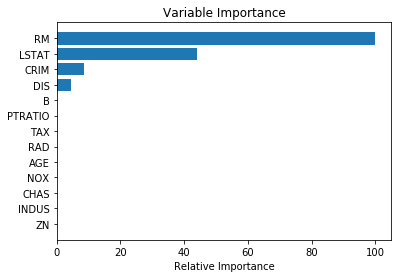

In [14]:
import matplotlib.pyplot as plt
feature_importance = model.feature_importances_
feature_importance = 100.0*(feature_importance/feature_importance.max())
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+.5
plt.barh(pos,feature_importance[sorted_idx], align='center')
plt.yticks(pos,boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title("Variable Importance")
plt.show()

# Lets tune the hyperparameters

In [16]:
from sklearn.model_selection import GridSearchCV
LR={'learning_rate':[0.15,1.0,0.10,0.05],
    'n_estimators':[100,150,200,250]}
tuning=GridSearchCV(estimator= GradientBoostingRegressor(),
                   param_grid=LR, scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_,tuning.best_score_

({'learning_rate': 0.05, 'n_estimators': 150}, 0.8180144374354101)